In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import math

from numpy import genfromtxt
from matplotlib import ticker, cm
from matplotlib.patches import Rectangle
from numpy import inf

In [4]:
# code aus paper

def get_fi_alps(alp_ind):
    alp = [-1.5,-0.8,-0.5,-0.2, 0, 0.2,0.5,0.8,1.5]
    news =[]
    for i in alp_ind:
        #print('i',i)
        real_value = alp[i-1]   
        #print('real_value',real_value)
        ratio_value = abs((-2)-(real_value))/4
        #print('ratio_value',ratio_value)
        new_value = (ratio_value*60)
        #print('new_value',new_value)
        news.append(new_value)
    return news

def get_fi_ics(ics_ind):
    ics= [-1,-0.6,-0.4,-0.1,0,0.1,0.4,0.6,1]
    news =[]
    for i in ics_ind:  
        real_value = ics[i-1]
        ratio_value = abs((-2)-(real_value))/4
        new_value = (ratio_value*41)
        news.append(new_value)
    return news

def read_fish_file(bifurcation_type,reduction_method,logging):
    path_to_file= "/home/elisabeth/master_data/er4517/public_html/assets/js/fish_data/"
    name=str(bifurcation_type)+"_"+str(reduction_method)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    if(logging):
        csv[np.isnan(csv)]=3
        out_array = np.log(csv) 
        return out_array
    else:
        csv[np.isnan(csv)]=3
        return csv

def make_fish_plots(csv):
    my_alps= get_fi_alps(alphas)
    my_ics= get_fi_ics(ics)
    ax_main = fig.add_subplot(3,3,5)
    ax_main.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    ax_main.set_facecolor('white')
    plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    plt.xlabel("Bifurcation parameter α")
    plt.ylabel("Initial condition IC") 
    countouring=ax_main.contourf(np.transpose(csv),cmap='Blues',alpha=0.9)
    cbar = fig.colorbar(countouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    plt.plot(my_alps,my_ics,marker="x",linestyle='None',label="Truth",color="white",markersize=16,markerfacecolor='gold',markeredgewidth=1.5, markeredgecolor="gold")
    texts=["a","b","c","d","e"]
    for i in range(5):
        plt.annotate(texts[i], (my_alps[i]+0.7, my_ics[i]+0.7) ,size=20,color='black')
    ic_plot=fi_ic(csv)
    alpha_plot=fi_alpha(csv)
    return countouring,ic_plot,alpha_plot

def fi_alpha(csv):
    ax_alpha = fig.add_subplot(3,3,2)
    plt.xlabel("Bifurcation parameter α")
    plt.ylabel("Marginal Fisher Information")
    plt.gca().invert_xaxis()
    plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    #plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    finit_sums=[]
    for j in range(len(csv)):
        j_sum = 0
        for i in csv[j]:
            if np.isfinite(i):
                j_sum+=i
        finit_sums.append(j_sum)
    plt.gca().invert_xaxis()
    alpha_side = ax_alpha.plot(range(len(finit_sums)),finit_sums) 
    cbar = fig.colorbar(countouring,ticks=range(2),fraction=0.09)
    cbar.ax.set_ylabel('')
    #cbar.ax.add_patch(Rectangle((1, 1), 50, 30, facecolor='red'))
    #right = ax_right.plot(range(len(finit_sums)),finit_sums) 
    return alpha_side

def fi_ic(csv):
    ax_ic = fig.add_subplot(3,3,4)  
    plt.ylabel("Initial Condition")
    plt.xlabel("Marginal Fisher Information")
    #plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    ax_ic.yaxis.set_label_position('left')
    finit_sums=[]    
    for j in range(len(csv[1])):
        j_sum = 0
        for i in range(len(csv)):
            if np.isfinite(csv[i][j]):
                j_sum+=csv[i][j]
        finit_sums.append(j_sum)
    ic_side = ax_ic.plot(finit_sums,range(len(finit_sums)))
    plt.gca().invert_xaxis()
    cbar = fig.colorbar(countouring,ticks=range(2),fraction=0.09)
    cbar.ax.set_ylabel('')
    
    
    #right = ax_right.plot(range(len(finit_sums)),finit_sums) 
    return ic_side

In [5]:
def read_fish_file(w0, m, M, noise, path_to_file):
    name="fish"+"_"+str(w0)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    return csv

In [32]:
data = read_fish_file(0.95,0.45,1000,0.0,"c:/Users/lisah/Documents/Repos/ma-code/data/fisher/m0.45/")
np.min(np.log(data))

np.float64(6.907266291129001)

In [7]:
def n(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)
    
def bif_plot(ax, m):
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n(a, m, True) for a in a_vals]
    n_minus = [n(a, m, False) for a in a_vals]

    ax.plot(a_vals, np.real(n_plus), color='blue',linewidth=2)
    ax.plot(a_vals, np.real(n_minus), color='blue', linestyle="--",linewidth=2)
    ax.plot(2*m, 1, marker='o', color='blue', markersize=6)
    ax.set_ylim(0, 4)
    ax.axhline(y=0, color='blue', linewidth=4)
    ax.set_xlabel('Water Input a')
    ax.set_ylabel('Biomass n')
    ax.grid(True)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

In [43]:
def make_fish_plots(csv):
    my_alps= get_fi_alps(alphas)
    my_ics= get_fi_ics(ics)
    ax_main = fig.add_subplot(3,3,5)
    ax_main.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    ax_main.set_facecolor('white')
    plt.xticks([0,15,30,45,60],[-2,-1,0,1,2])
    plt.yticks([0,10,20,30,40],[-2,-1,0,1,2])
    plt.xlabel("Bifurcation parameter α")
    plt.ylabel("Initial condition IC") 
    countouring=ax_main.contourf(np.transpose(csv),cmap='Blues',alpha=0.9)
    cbar = fig.colorbar(countouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    plt.plot(my_alps,my_ics,marker="x",linestyle='None',label="Truth",color="white",markersize=16,markerfacecolor='gold',markeredgewidth=1.5, markeredgecolor="gold")
    texts=["a","b","c","d","e"]
    for i in range(5):
        plt.annotate(texts[i], (my_alps[i]+0.7, my_ics[i]+0.7) ,size=20,color='black')
    ic_plot=fi_ic(csv)
    alpha_plot=fi_alpha(csv)
    return countouring,ic_plot,alpha_plot


def make_fish_plot(fig, ax, csv):

    # take log data bec values are very high
    csv = np.log(csv)

    # points at which fish data is evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    inits_y_ticks = np.arange(0.0, 4.1, 0.1)

    # all values below -8 are mapped to -8
    levels = np.linspace(math.ceil(np.min(csv)),  math.floor(np.max(csv)),20)

    #ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    #ax.set_facecolor('white')
    countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Blues',alpha=0.9, levels=levels)
    ax.set_yticks(inits_y_ticks[::4])
    ax.set_xticks(a_x_ticks[::4])
    ax.set_xlabel("a")
    ax.set_ylabel("IC")
    cbar = fig.colorbar(countouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    cbar.set_ticks([math.ceil(np.min(csv)), math.floor(np.max(csv))])
    return countouring

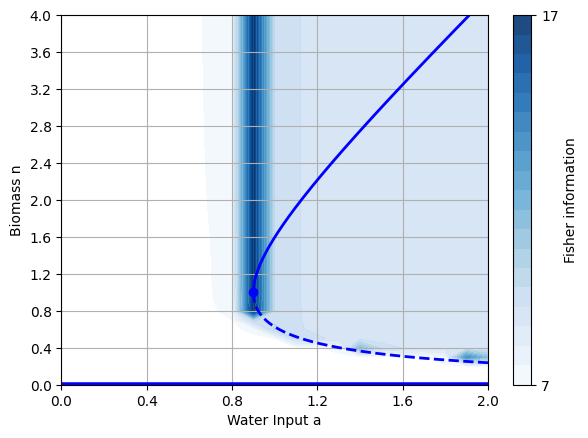

In [44]:
# generate all plots

path_to_file= "c:/Users/lisah/Documents/Repos/ma-code/data/fisher/m0.45/"
M_vals = [1000]
noise_vals = [0.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)

for M in M_vals:
    for noise in noise_vals:
        csv = read_fish_file(w0,m,M,noise,path_to_file)
        fig, ax = plt.subplots()
        make_fish_plot(fig, ax, csv)
        bif_plot(ax,m)
        #plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m0.45/fish_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')